In [1087]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime

# Part 1

In [1088]:
file_path = './ultimate_challenge/logins.json'

In [1089]:
logins = pd.read_json(file_path)

In [1090]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [1091]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [1092]:
logins.isnull().sum()

login_time    0
dtype: int64

There are no null values

Count login times for invervals of 15 minutes

In [1093]:
logins['count'] = 1
logins.set_index('login_time', inplace=True)
count_15m = logins[['count']].resample('15min').sum()

In [1094]:
count_15m.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [1095]:
count_15m.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


(array([  1200,  44640,  84960, 129600, 148005], dtype=int64),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

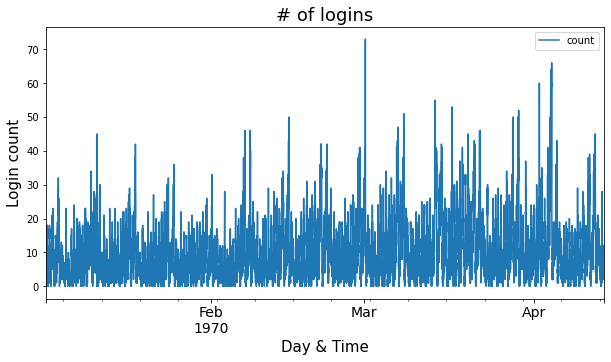

In [1096]:
count_15m.plot(figsize=(10,5))
plt.xticks()
plt.title('# of logins', fontsize=18)
plt.xlabel('Day & Time', fontsize=15)
plt.ylabel('Login count', fontsize=15)
plt.xticks(fontsize=14)

(array([12960, 20145], dtype=int64), [Text(0, 0, ''), Text(0, 0, '')])

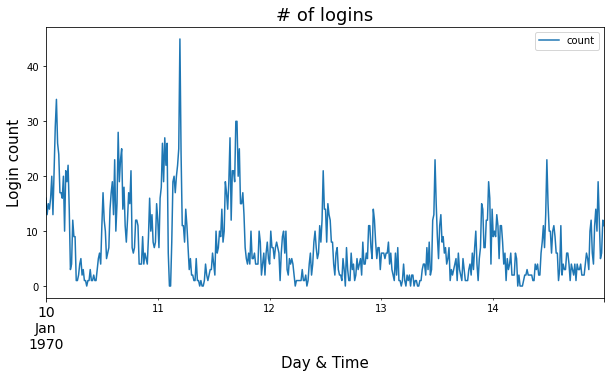

In [1097]:
count_15m['1970-01-10':'1970-01-14'].plot(figsize=(10,5))
plt.title('# of logins', fontsize=18)
plt.xlabel('Day & Time', fontsize=15)
plt.ylabel('Login count', fontsize=15)
plt.xticks(fontsize=14)

### The plots show there is a pattern that there are two login peak times each day: mid of the day and at night ###

In [1098]:
count_15m['date_time'] = count_15m.index

In [1099]:
count_15m['day_of_week'] = count_15m['date_time'].dt.day_name()

In [1100]:
count_dayofweek = count_15m.groupby('day_of_week')['count'].sum()
count_dayofweek

day_of_week
Friday       15208
Monday        8823
Saturday     19377
Sunday       18167
Thursday     11960
Tuesday       9268
Wednesday    10339
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

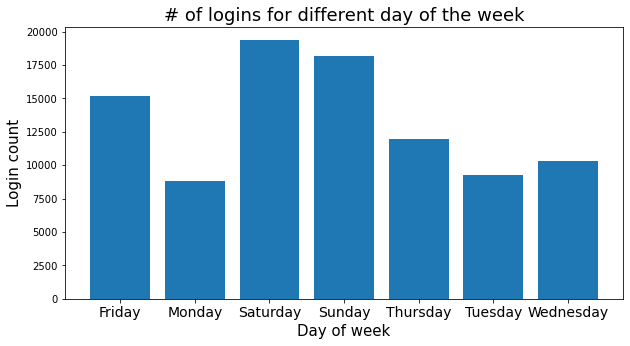

In [1101]:
fig = plt.subplots(figsize=(10,5))
plt.bar(x=count_dayofweek.index, height=count_dayofweek)
plt.title('# of logins for different day of the week', fontsize=18)
plt.xlabel('Day of week', fontsize=15)
plt.ylabel('Login count', fontsize=15)
plt.xticks(fontsize=14)

### This plot shows that the weekend dates (Saturday, Sunday and Friday) have higher login frequency than the weekdays. ###

# Part 2

### Question 1
1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?

I would use the number of times that the drive partners cross the tollgates as a measurement of the effectiveness of the new change. The reason is because the drivers will pass the tollgate more frequently if they like the idea of toll reimbursement.

### Question 2
Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:

a) how you will implement the experiment

1. Randomly choose a group of driver partners from these two city, say 100 drivers.
2. For each of these 100 drivers, count how many times he or she crosses the tollgate within 30 days before and after the reimbursement policy.
3. We will compare the change in the traveling frequency before and after.

b) what statistical test(s) you will conduct to verify the significance of the
observation

Use a one sided paired T test. For the same groups of drivers, we have a count of bridge crossing before and after the new policy for each driver.
We can calculate the change for each driver, and calculate the mean of the change over the entire group.
The null hypothesis H0 is there is no change in the average number before and after, or, in another word, the average change in the entire sample is 0.
The alternative hypothesis is that the average counts after the policy is in place is greater than before, or, in another word, the average change after the policy is greater than 0.
We will calculate the p value of this t-test to draw a conclusion about the effectiveness of the new policy.

c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

1. If the p value is less than 0.05, the null hypothesis will be rejected, meaning there is sufficient change in traveling frequecy between the two cities to state that the toll reimbursement policy is effective. We would recommend to the city operations team to put the new policy in execution.
2. If p value is greater than 0.05, we can not prove the new policy is effective. In this case we would recommend the operation teams to consider more incentives to the driver partners or bring in some other changes.

The caveats are:
1. The sample may not be large enough
2. The observation peroid of 30 days may not be long enough
3. We must make sure all drivers in the sample are active before and after the toll reimbursement policy (eg: no health issues or other factors cause a driver to be out of work for some days)

# Part 3

In [1102]:
from datetime import datetime, timedelta
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [1103]:
file_path = './ultimate_challenge/ultimate_data_challenge.json'

In [1104]:
data = pd.read_json(file_path)
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


## 1. EDA and pre-processing

In [1105]:
data.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [1106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


We need to take care of the null data in three features before modeling. 

Let's first calculate the portion of active users. To do this, we first need to conver the two dates features from string objects to datetime objects.

In [1107]:
#change the two dates columns to datetime type
fmt = '%Y-%m-%d'
data['signup_date_dt'] = pd.to_datetime(data.signup_date, format=fmt)
data['last_trip_date_dt'] = pd.to_datetime(data.last_trip_date, format=fmt)
data.drop(['signup_date', 'last_trip_date'], axis=1, inplace=True)

Now let's calculate the percentage of retained users. All users signed up in January, so June is the 6th months. The data was pulled at July 1st. So the active or retained users are the ones that took the last trip in June (or within 30 days before July 1st).

In [1108]:
data['active'] = np.int8(data['last_trip_date_dt'] >= (data.last_trip_date_dt.max() - timedelta(days=30)))
print('The portion of user retained is ', np.round(data.active.sum()/data.shape[0],3))

The portion of user retained is  0.376


### Handle the missing data.

In [1109]:
data['avg_rating_of_driver'].fillna(data['avg_rating_of_driver'].mean(), inplace=True)
data['avg_rating_by_driver'].fillna(data['avg_rating_by_driver'].mean(), inplace=True)

(array([0, 1]), [Text(0, 0, 'iPhone'), Text(1, 0, 'Android')])

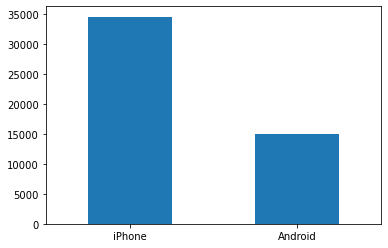

In [1110]:
data.phone.value_counts().plot(kind='bar')
plt.xticks(rotation=0)

In [1111]:
data['phone'].fillna('iPhone', inplace=True)

In [1112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   avg_rating_of_driver    50000 non-null  float64       
 3   avg_surge               50000 non-null  float64       
 4   phone                   50000 non-null  object        
 5   surge_pct               50000 non-null  float64       
 6   ultimate_black_user     50000 non-null  bool          
 7   weekday_pct             50000 non-null  float64       
 8   avg_dist                50000 non-null  float64       
 9   avg_rating_by_driver    50000 non-null  float64       
 10  signup_date_dt          50000 non-null  datetime64[ns]
 11  last_trip_date_dt       50000 non-null  datetime64[ns]
 12  active                  50000 non-null  int8  

### Convert categorical features to integers

Encode the categorial columns of 'city' and 'phone'. Convert the boolean column 'ultimate_black_user' to integer

In [1113]:
lbl_encoder_city = LabelEncoder()
data['city'] = lbl_encoder_city.fit_transform(data.city)

lbl_encoder_phone = LabelEncoder()
data['phone'] = lbl_encoder_phone.fit_transform(data.phone)

In [1114]:
data['ultimate_black_user'] = np.int8(data['ultimate_black_user'])

### Features selection

<AxesSubplot:>

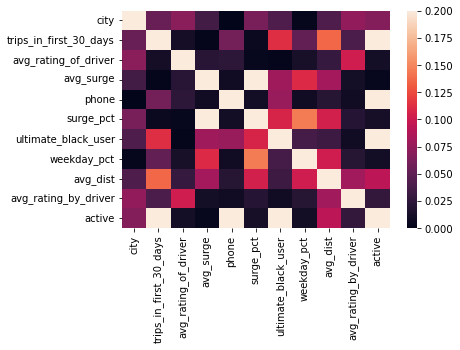

In [1115]:
sns.heatmap(abs(data.corr()), vmin=0, vmax=0.2)

All users signed up in January, therefore the signup_date is not supposed to be relevant to user's activeness. 

Since activeness is calculated with last_trip_date, we should drop the column of last_trip_date.

From the heatmap, we see that features 'avg_surge', 'surge_pct', 'avg_rating_of_driver', avg_rating_by_driver', 'weekday_pct' all have little correlation with user activeness. Therefore we can drop these features.



In [1116]:
data.drop(['signup_date_dt', 'last_trip_date_dt', 'surge_pct', 'avg_rating_of_driver', 'avg_surge', 'weekday_pct', 'avg_rating_by_driver'], axis=1, inplace=True)

In [1117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  int32  
 1   trips_in_first_30_days  50000 non-null  int64  
 2   phone                   50000 non-null  int32  
 3   ultimate_black_user     50000 non-null  int8   
 4   avg_dist                50000 non-null  float64
 5   active                  50000 non-null  int8   
dtypes: float64(1), int32(2), int64(1), int8(2)
memory usage: 1.2 MB


<AxesSubplot:>

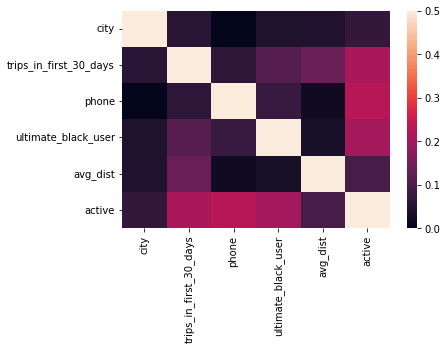

In [1118]:
sns.heatmap(abs(data.corr()), vmin=0, vmax=0.5)

### Explore the influence of differnt features on the users' activeness

feature "city"

In [1119]:
city = lbl_encoder_city.classes_
print('Portion of active users for different cities:')
for i in range(0, len(city)):
    active = data[data['city'] == i]['active'].sum()
    print('{}: {}'.format(city[i], np.round(active/(data[data['city']==i].shape[0]),2)))

Portion of active users for different cities:
Astapor: 0.26
King's Landing: 0.63
Winterfell: 0.35


feature 'phone'

In [1120]:
phone = lbl_encoder_phone.classes_
print('Portion of active users for different phone types:')
for i in range(0, len(phone)):
    active = data[data['phone'] == i]['active'].sum()
    print('{}: {}'.format(phone[i], np.round(active/(data[data['phone']==i].shape[0]),2)))

Portion of active users for different phone types:
Android: 0.21
iPhone: 0.45


feature 'ultimate_black_user'

In [1121]:
print('Portion of active users for ultimate black user:')
black=['non-ultimate_black_user', 'ultimate_black_user']
for i in range(0, 2):
    active = data[data['ultimate_black_user'] == i]['active'].sum()
    print('{}: {}'.format(black[i], np.round(active/(data[data['ultimate_black_user']==i].shape[0]),2)))

Portion of active users for ultimate black user:
non-ultimate_black_user: 0.3
ultimate_black_user: 0.5


#### These exploration confirms that these features do have implace on user's activeness.

### Data scaling

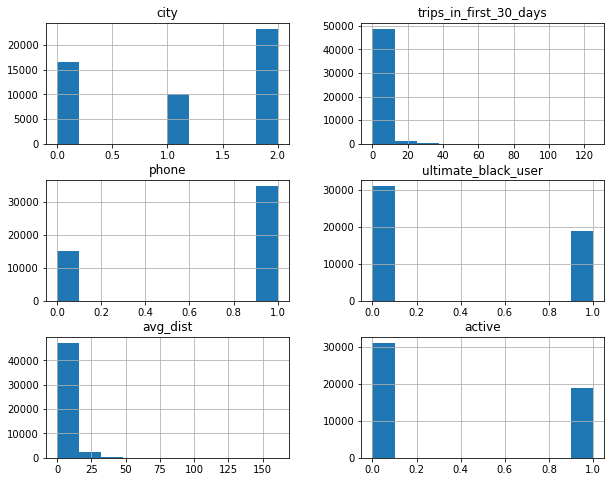

In [1122]:
data.hist(figsize=(10,8))
plt.show()

In [1123]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [1124]:
X = data.drop(['active'],axis=1)
y = data.active
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22,stratify=y)

None of the features has normal distribution. Therefore we should use Min-max scaler for scaling.

We fit the scaler using X_train, and apply the scaler to X_test

In [1125]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 2. Modeling

This is a binary classification problem. We will test three types of models: Logistic Regression, Random Forest and Adaboost. We will user grid search and cross-valiation to get the optimal and reliabel parameters.

Evaluation: we will use accuracy and F1 score to evaluate the model performance. For this particular project, we are trying to predict whether a user will churn. For this particular prediction, we should minimze false positive (y_true=0, y_pred=1), in another word, we should try to avoid predicting a user to stay but in fact the user leaves.

In [1126]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC

### 2.1 Logistic Regression

In [1127]:
from sklearn.linear_model import LogisticRegression

In [1128]:
# Instantiate model
lr1 = LogisticRegression(penalty='l2') # instantiate logreg w/ l1 regularization
lr1.fit(X_train, y_train)
y_test_pred1 = model.predict(X_test)

# Generate confusion matrix
print('Confusion matrix: ')
print(confusion_matrix(y_test, y_test_pred1))

Confusion matrix: 
[[8808 1487]
 [3661 2544]]


In [1129]:
lr2 = LogisticRegression(penalty='l1', solver='saga')
lr2.fit(X_train, y_train)
y_test_pred2 = lr.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, y_test_pred2))

[[8805 1490]
 [3654 2551]]
              precision    recall  f1-score   support

           0       0.71      0.86      0.77     10295
           1       0.63      0.41      0.50      6205

    accuracy                           0.69     16500
   macro avg       0.67      0.63      0.64     16500
weighted avg       0.68      0.69      0.67     16500



These two models give similar results. But the accuracy is low and there are a lot of false positives.

We can check the accuracy on the training set and see if there is overfit. We get similar numbers, so there is no overfit here.

In [1130]:
y_train_pred = lr1.predict(X_train)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[17973  2928]
 [ 7267  5332]]
              precision    recall  f1-score   support

           0       0.71      0.86      0.78     20901
           1       0.65      0.42      0.51     12599

    accuracy                           0.70     33500
   macro avg       0.68      0.64      0.65     33500
weighted avg       0.69      0.70      0.68     33500



### Feature importance suggested by Logistic Regression model

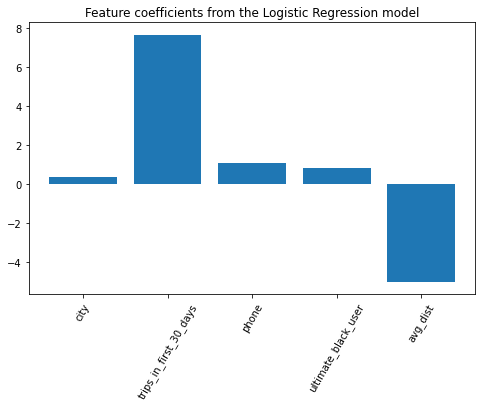

In [1131]:
coef = lr1.coef_.flatten().tolist()
features = data.columns.drop(['active'])
plt.subplots(figsize=(8,5))
plt.bar(x=features.tolist(), height=coef)
plt.title('Feature coefficients from the Logistic Regression model')
plt.xticks(rotation = 60)
plt.show()

The order of importance given by the Logistic Regression model is: 

trips_in_first_30_days -> avg_dist -> phone -> ultimate_black_user -> city

### 2.2 Random Forest

Use GridSearchCV to model with different combinations of parameters.

In [1132]:
rf = RandomForestClassifier(random_state=42, min_samples_split=100)
nEstimators=[10,20,30,40,50]
maxDepth=[3,4,5,6,7,8]
params = {"n_estimators": nEstimators, 
          "max_depth": maxDepth}
clf = GridSearchCV(rf, param_grid=params, cv=5)

In [1133]:
clf.fit(X_train, y_train)
y_test_pred = clf.best_estimator_.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80     10295
           1       0.68      0.53      0.60      6205

    accuracy                           0.73     16500
   macro avg       0.72      0.69      0.70     16500
weighted avg       0.72      0.73      0.72     16500



In [1134]:
clf.best_params_

{'max_depth': 8, 'n_estimators': 40}

In [1135]:
print(confusion_matrix(y_test, y_test_pred))

[[8733 1562]
 [2886 3319]]


The accuracy is better than the Logistic Regression models. The number of false positive is less but there is still a lot of them.

We can plot the feature importance suggested by the Random Forest model.

In [1136]:
rf = RandomForestClassifier(random_state=42, min_samples_split=100, max_depth=8, n_estimators=40)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=100, n_estimators=40,
                       random_state=42)

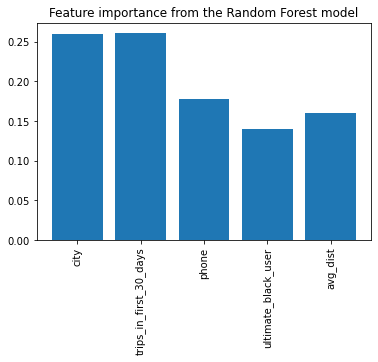

In [1137]:
plt.subplots(figsize=(6,4))
plt.bar(x=features.tolist(), height=rf.feature_importances_)
plt.xticks(rotation = 90)
plt.title('Feature importance from the Random Forest model')
plt.show()

The order of feature importance implied by the Random Forest model is:

trips_in_first_30_days -> city -> phone -> avg_dist -> ultimate_black_user

### 2.3 Adaboost

In [1138]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(random_state=99)
nEstimators=[10,20,30,40,50]
learning_rate=[0.1,1.0,10]
params = {"n_estimators": nEstimators,
         'learning_rate': learning_rate}
clf = GridSearchCV(ada, param_grid=params, cv=5)

clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=99),
             param_grid={'learning_rate': [0.1, 1.0, 10],
                         'n_estimators': [10, 20, 30, 40, 50]})

In [1139]:
y_test_pred = clf.best_estimator_.predict(X_test)
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.75      0.84      0.79     10295
           1       0.67      0.53      0.59      6205

    accuracy                           0.72     16500
   macro avg       0.71      0.69      0.69     16500
weighted avg       0.72      0.72      0.72     16500

[[8684 1611]
 [2935 3270]]


In [1140]:
clf.best_params_

{'learning_rate': 1.0, 'n_estimators': 50}

In [1141]:
ada = AdaBoostClassifier(random_state=99, learning_rate=1.0, n_estimators=50)
ada.fit(X_train, y_train)

AdaBoostClassifier(random_state=99)

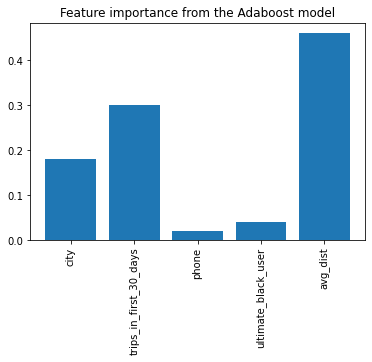

In [1142]:
plt.subplots(figsize=(6,4))
plt.bar(x=features.tolist(), height=ada.feature_importances_)
plt.title('Feature importance from the Adaboost model')
plt.xticks(rotation = 90)
plt.show()

The Adaboost model has very similar performance as the Random Forest model.

The order of feature importance implied by the Adaboost model is:

avg_dist -> trips_in_first_30_days -> city -> ultimate_black_user -> phone 

# 3. Summary

#### Among the three types of models, Random Forest seems to be the best. 
#### Order of feature importance


2. The models suggest "trips_in_first_30_days" is the most important feature that has positive influence on user's activeness. It means a frequent rider tends to stay. 
3. "avg_dis" is the second important feature but it has a negative influence. Longer distance cost more, and users who rider longer distance tend to take less rides and therefore are more likely to become inactive when we use 30 days to define active/inactive.
4. Phone type surprisingly has influence on whether users churn. iPhone users tend to stays more likely than Android users. The reason might be that iPhones are more expensive than Android phones and iPhone users are more willing to spend money on rides.
5. City is another feature that has impact on whether a user churns. Users who signed up in King's Landing seem to more likely to stay. The reason might be that residents in this city has higher income or some other reasons.

#### Concerns

The modeling accuracy is still not great with a significant number of false positives. This may have to do with the imbalanced active ratio.

# 4. Recommendations

1. Provide more incentives to the users in the first 30 days.
2. Maybe give some discounts on long distance rides so users who take long distance rides tend to stay.
3. Encourage more iPhone users to sign up.
4. Encourage more users from King's Landing to sign up.
